# Explore here

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# escalado
from sklearn.preprocessing import StandardScaler

# métricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import pickle

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/refs/heads/main/winequality-red.csv', sep=';')
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

#### Exploración inicial de los datos

In [4]:
print("=== EXPLORACIÓN INICIAL ===")
print(f"Dimensiones del dataset: {df.shape}")
print("\nPrimeras 5 filas:")
print(df.head())

=== EXPLORACIÓN INICIAL ===
Dimensiones del dataset: (1599, 12)

Primeras 5 filas:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   

In [5]:
print("Información del dataset:")
print(df.info())


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [6]:
print("Estadísticas descriptivas:")
print(df.describe())

Estadísticas descriptivas:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000   

In [7]:
print("\n=== ANÁLISIS DE DUPLICADOS ===")
duplicados = df.duplicated().sum()
print(f"Número de duplicados: {duplicados}")
print(f"Porcentaje de duplicados: {(duplicados/len(df))*100:.2f}%")


=== ANÁLISIS DE DUPLICADOS ===
Número de duplicados: 240
Porcentaje de duplicados: 15.01%


In [8]:
# Mostrar algunos duplicados para inspección
if duplicados > 0:
    print("Ejemplo de filas duplicadas:")
    duplicados_df = df[df.duplicated(keep=False)]
    print(duplicados_df.head())
    
    # Análisis de duplicados por calidad
    print("\nDistribución de duplicados por calidad:")
    print(duplicados_df['quality'].value_counts().sort_index())

Ejemplo de filas duplicadas:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             7.4              0.70         0.00             1.9      0.076   
4             7.4              0.70         0.00             1.9      0.076   
9             7.5              0.50         0.36             6.1      0.071   
11            7.5              0.50         0.36             6.1      0.071   
22            7.9              0.43         0.21             1.6      0.106   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                  11.0                  34.0   0.9978  3.51       0.56   
4                  11.0                  34.0   0.9978  3.51       0.56   
9                  17.0                 102.0   0.9978  3.35       0.80   
11                 17.0                 102.0   0.9978  3.35       0.80   
22                 10.0                  37.0   0.9966  3.17       0.91   

    alcohol  quality  
0       9.4        5  

Viendo como se distribuyen los duplicados según la calidad, y dado el volumen que representan dentro de los datos, se decide eliminar los duplicados del datset manteniendo la entrada inicial.

In [9]:
df = df.drop_duplicates(keep='first')
print(f'Dataset después de eliminar duplicados: {df.shape}')

Dataset después de eliminar duplicados: (1359, 12)


In [10]:
#Valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


### Análisis univariante 

Análisis de la variable objetivo

In [11]:
# Análisis de la variable objetivo (quality)
print("\n=== ANÁLISIS DE LA VARIABLE OBJETIVO ===")
print("Distribución de la calidad del vino:")
print(df['quality'].value_counts().sort_index())


=== ANÁLISIS DE LA VARIABLE OBJETIVO ===
Distribución de la calidad del vino:
quality
3     10
4     53
5    577
6    535
7    167
8     17
Name: count, dtype: int64


Se reagrupan en calidad baja (0), media (1) y alta (2)

In [12]:
df.loc[df['quality'] <= 5, 'quality'] = 0   # baja
df.loc[df['quality'] == 6, 'quality'] = 1  # media
df.loc[df['quality'] >= 7, 'quality'] = 2    # alta
# vemos qué cantidad de datos hay en cada calidad
df["quality"].value_counts().sort_index()

quality
0    640
1    535
2    184
Name: count, dtype: int64

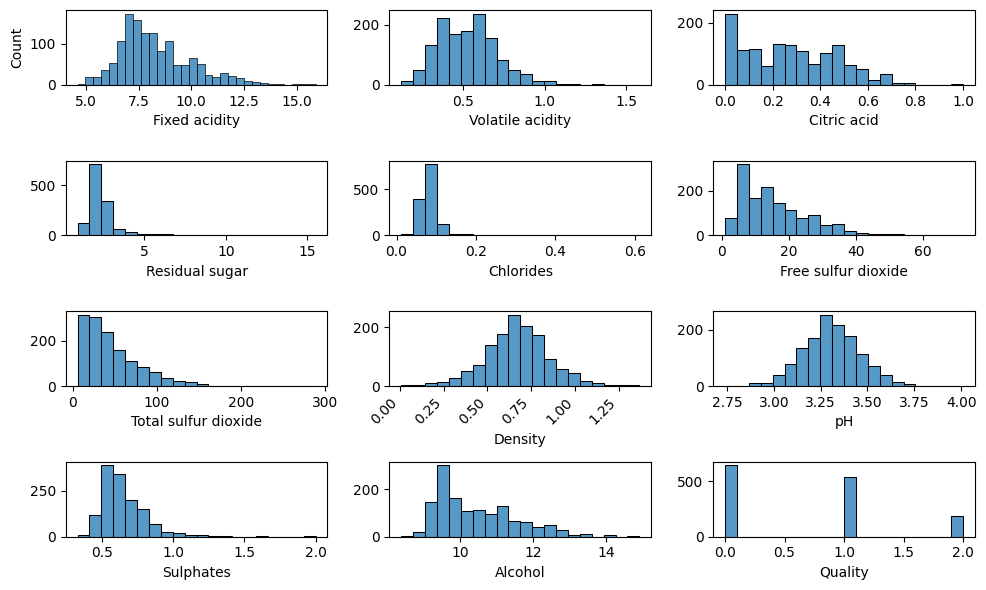

In [13]:
fig, axis = plt.subplots(4, 3, figsize=(10, 6), gridspec_kw={'height_ratios': [3, 3, 3, 3]})

sns.histplot(ax=axis[0, 0], data=df, x="fixed acidity").set(xlabel="Fixed acidity")
sns.histplot(ax=axis[0, 1], data=df, x="volatile acidity", bins=20).set(xlabel="Volatile acidity", ylabel=None)
sns.histplot(ax=axis[0, 2], data=df, x="citric acid", bins=20).set(xlabel="Citric acid", ylabel=None)

sns.histplot(ax=axis[1, 0], data=df, x="residual sugar", bins=20).set(xlabel="Residual sugar", ylabel=None)
sns.histplot(ax=axis[1, 1], data=df, x="chlorides", bins=20).set(xlabel="Chlorides", ylabel=None)
sns.histplot(ax=axis[1, 2], data=df, x="free sulfur dioxide", bins=20).set(xlabel="Free sulfur dioxide", ylabel=None)

sns.histplot(ax=axis[2, 0], data=df, x="total sulfur dioxide", bins=20).set(xlabel="Total sulfur dioxide", ylabel=None)
sns.histplot(ax=axis[2, 1], data=df, x="density", bins=20).set(xlabel="Density", ylabel=None)
axis[2, 1].set_xticklabels(axis[0, 2].get_xticklabels(), rotation=45, ha='right')
sns.histplot(ax=axis[2, 2], data=df, x="pH", bins=20).set(xlabel="pH", ylabel=None)

sns.histplot(ax=axis[3, 0], data=df, x="sulphates", bins=20).set(xlabel="Sulphates", ylabel=None)
sns.histplot(ax=axis[3, 1], data=df, x="alcohol", bins=20).set(xlabel="Alcohol", ylabel=None)
sns.histplot(ax=axis[3, 2], data=df, x="quality", bins=20).set(xlabel="Quality", ylabel=None)

plt.tight_layout()
plt.show()


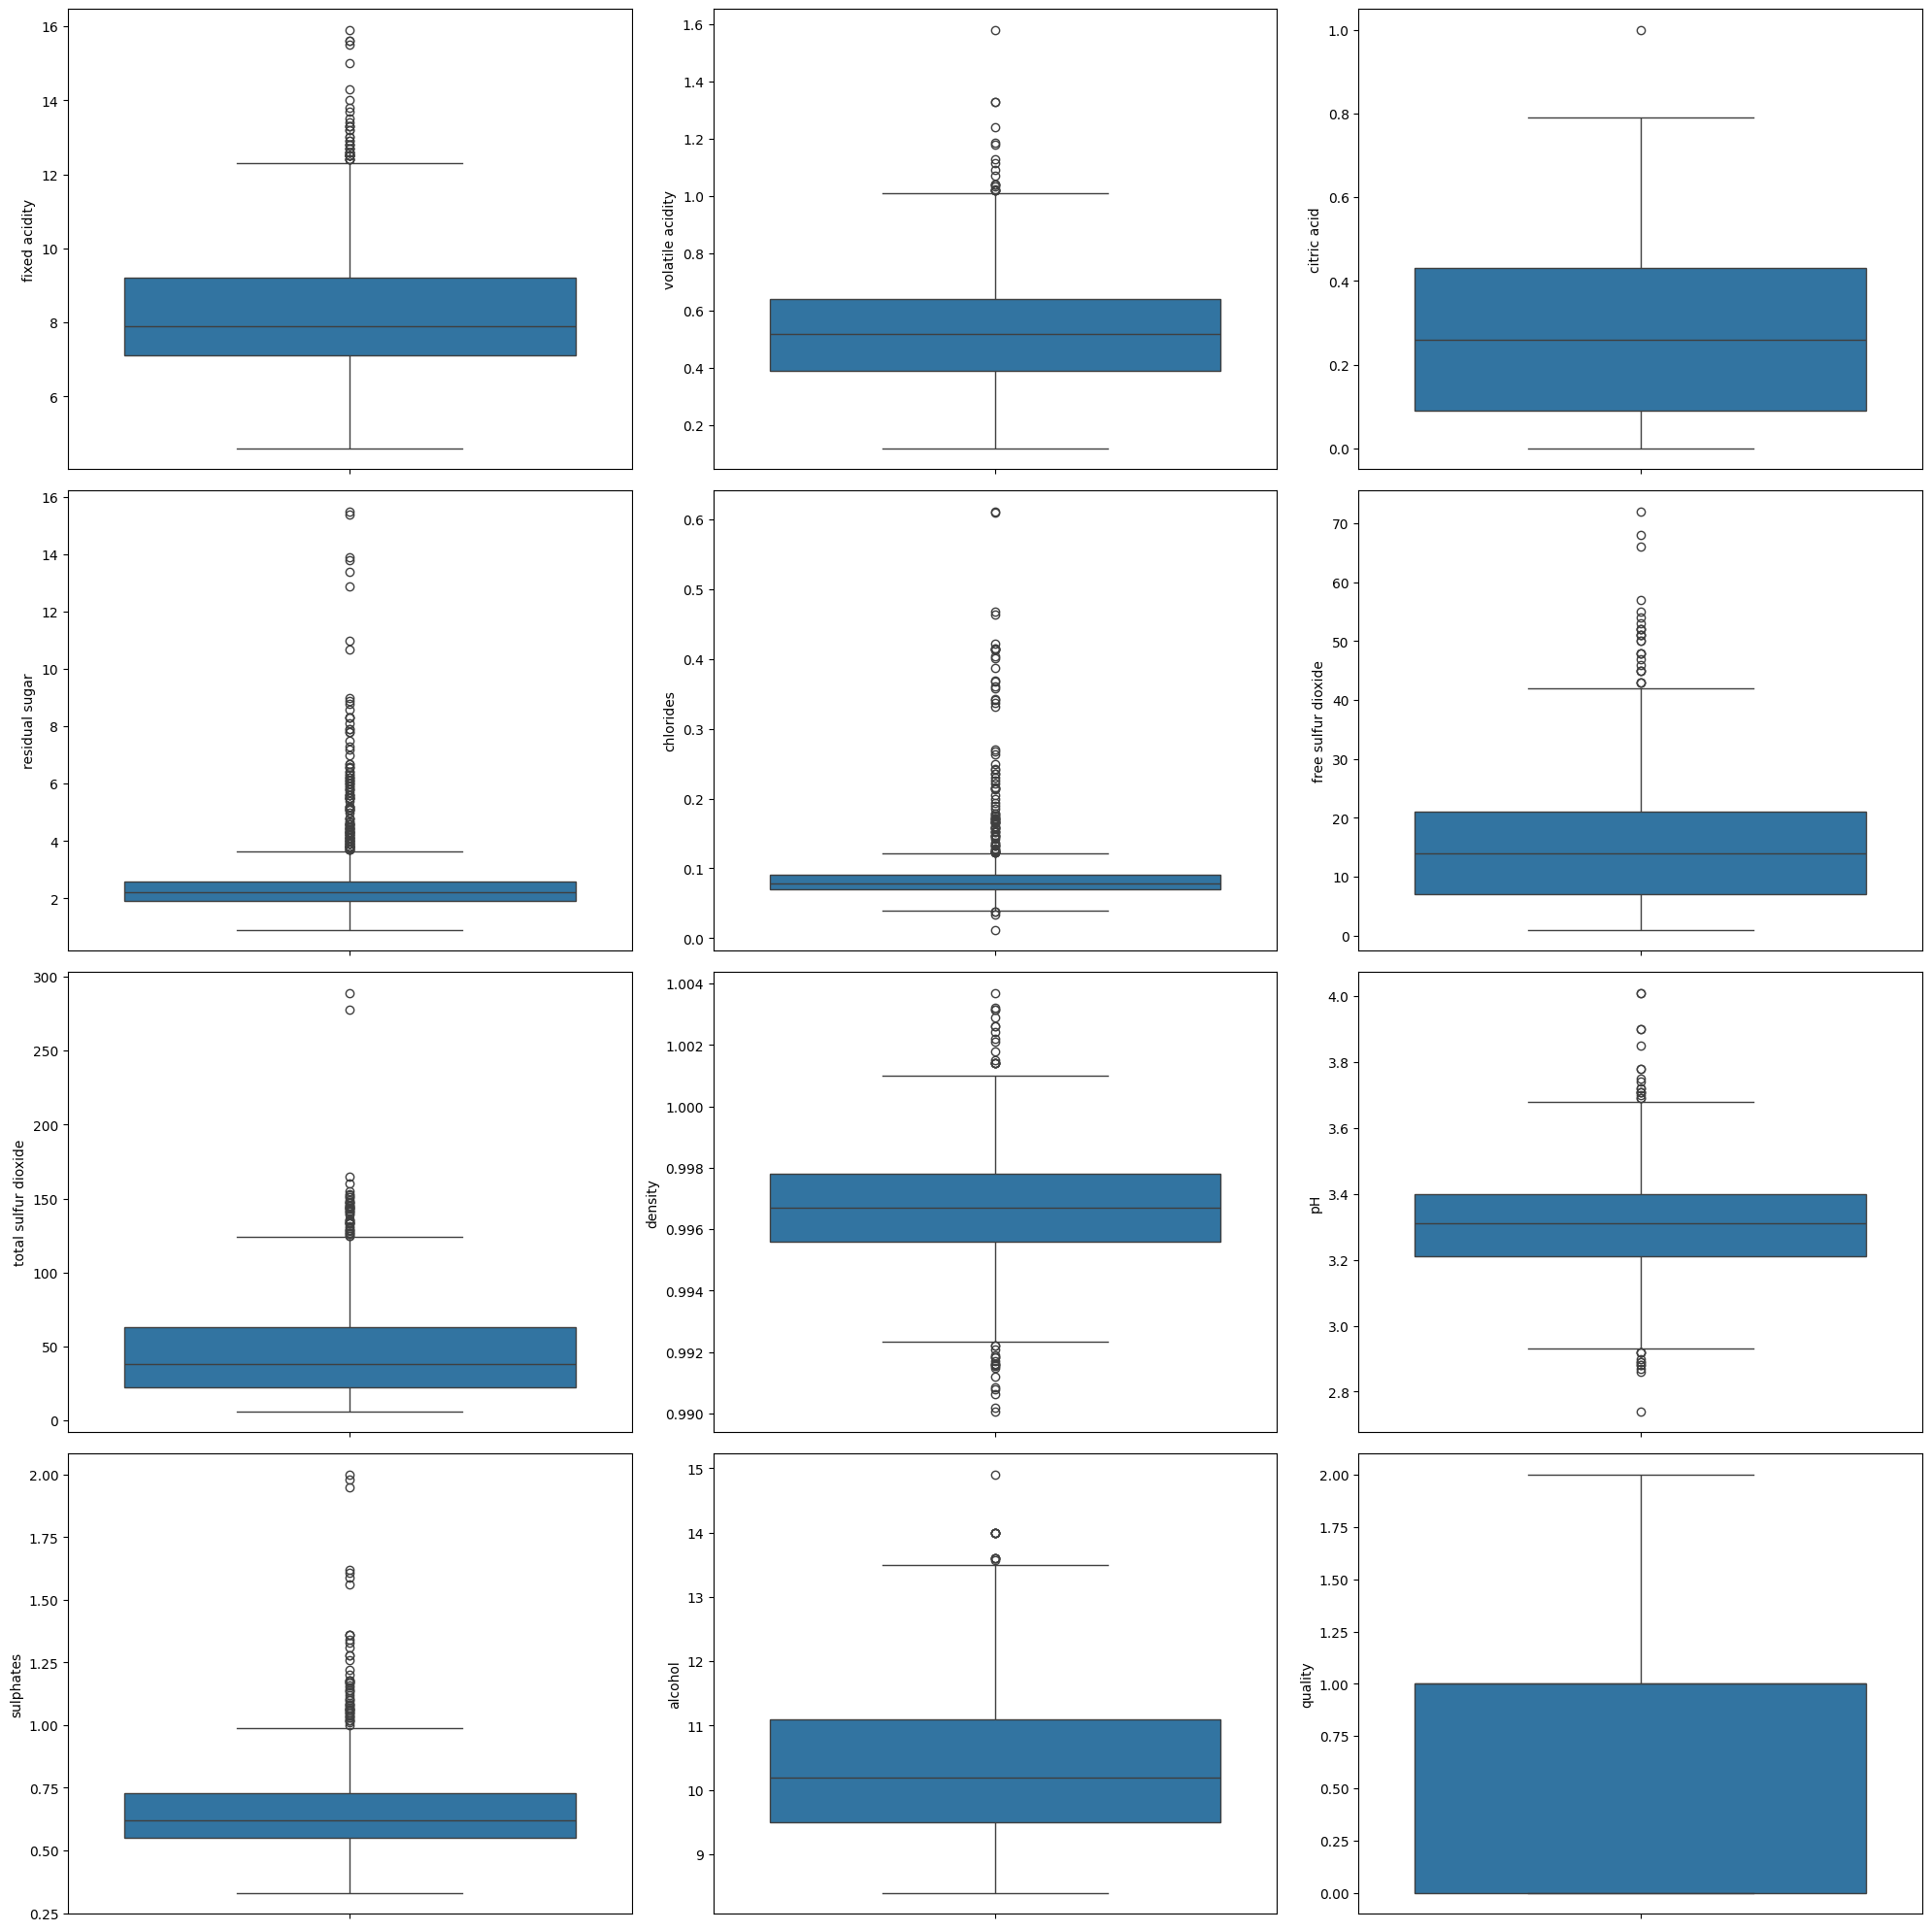

In [14]:
fig, axis = plt.subplots(4, 3, figsize=(20, 20))

sns.boxplot(ax=axis[0, 0], data=df, y="fixed acidity")
sns.boxplot(ax=axis[0, 1], data=df, y="volatile acidity")
sns.boxplot(ax=axis[0, 2], data=df, y="citric acid")

sns.boxplot(ax=axis[1, 0], data=df, y="residual sugar")
sns.boxplot(ax=axis[1, 1], data=df, y="chlorides")
sns.boxplot(ax=axis[1, 2], data=df, y="free sulfur dioxide")

sns.boxplot(ax=axis[2, 0], data=df, y="total sulfur dioxide")
sns.boxplot(ax=axis[2, 1], data=df, y="density")
sns.boxplot(ax=axis[2, 2], data=df, y="pH")

sns.boxplot(ax=axis[3, 0], data=df, y="sulphates")
sns.boxplot(ax=axis[3, 1], data=df, y="alcohol")
sns.boxplot(ax=axis[3, 2], data=df, y="quality")

plt.tight_layout()
plt.show()


Como se trata de vinos, tomaremos los outliers como características reales de la diversidad vitivinícola. Para poder tratar bien estos datos habrá que usar técnicas de escalado robustas que apoyen el modelo KNN, ya de por sí robust, en lugar de eliminarlos del datset.

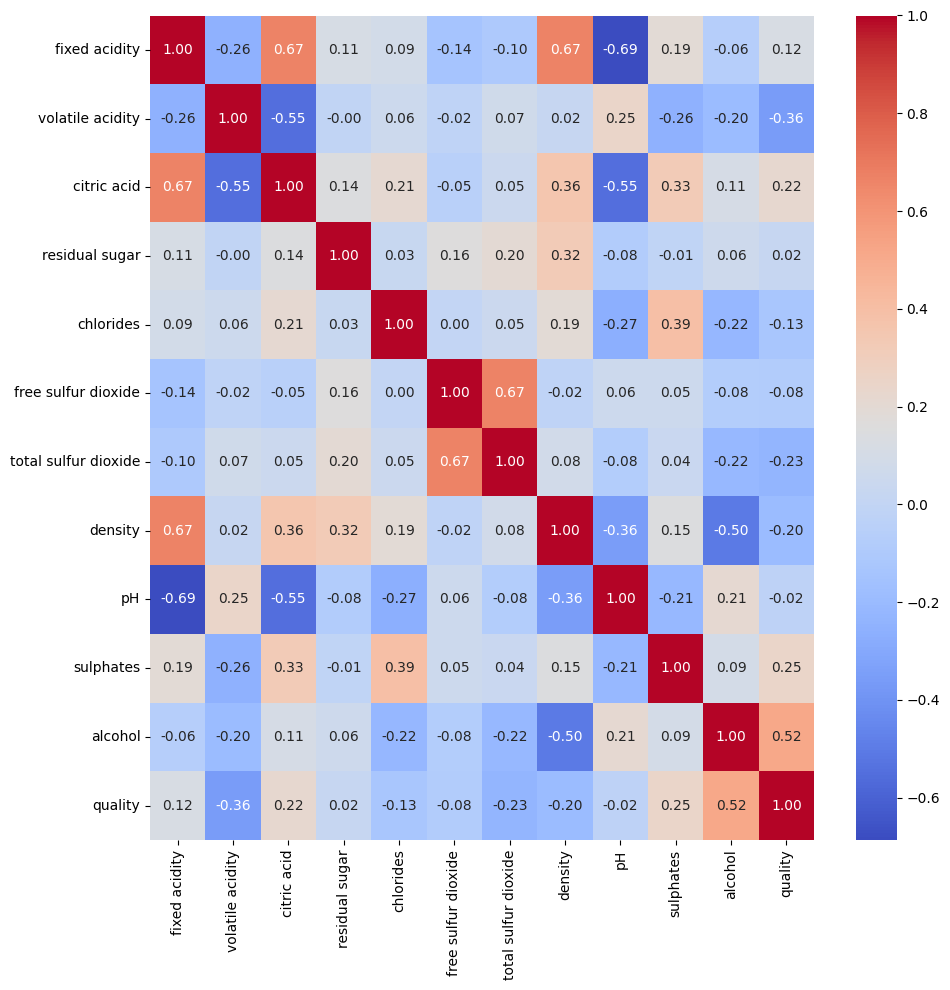

In [15]:
fig, axis = plt.subplots(figsize = (10, 10))

sns.heatmap(df.corr(), annot = True, fmt = ".2f", cmap = "coolwarm")

plt.tight_layout()
plt.show()

Basándome en la matriz de correlación, el alcohol parece ser el factor más determinante para la calidad del vino (correlación de 0.52), seguido positivamente por los sulfatos y el ácido cítrico. Contrariamente, la acidez volátil muestra la relación negativa más fuerte (-0.36), indicando que es un marcador clave de defectos en el vino. Las relaciones químicas entre variables son coherentes: la acidez fija se correlaciona positivamente con la densidad y negativamente con el pH, reflejando principios químicos fundamentales.

Variables clave para el modelo:

- Alcohol (predictor principal positivo)
- Acidez volátil (principal indicador negativo)
- Sulfatos y ácido cítrico (contribuyentes positivos)
- Dióxido de azufre total y densidad (factores negativos secundarios)

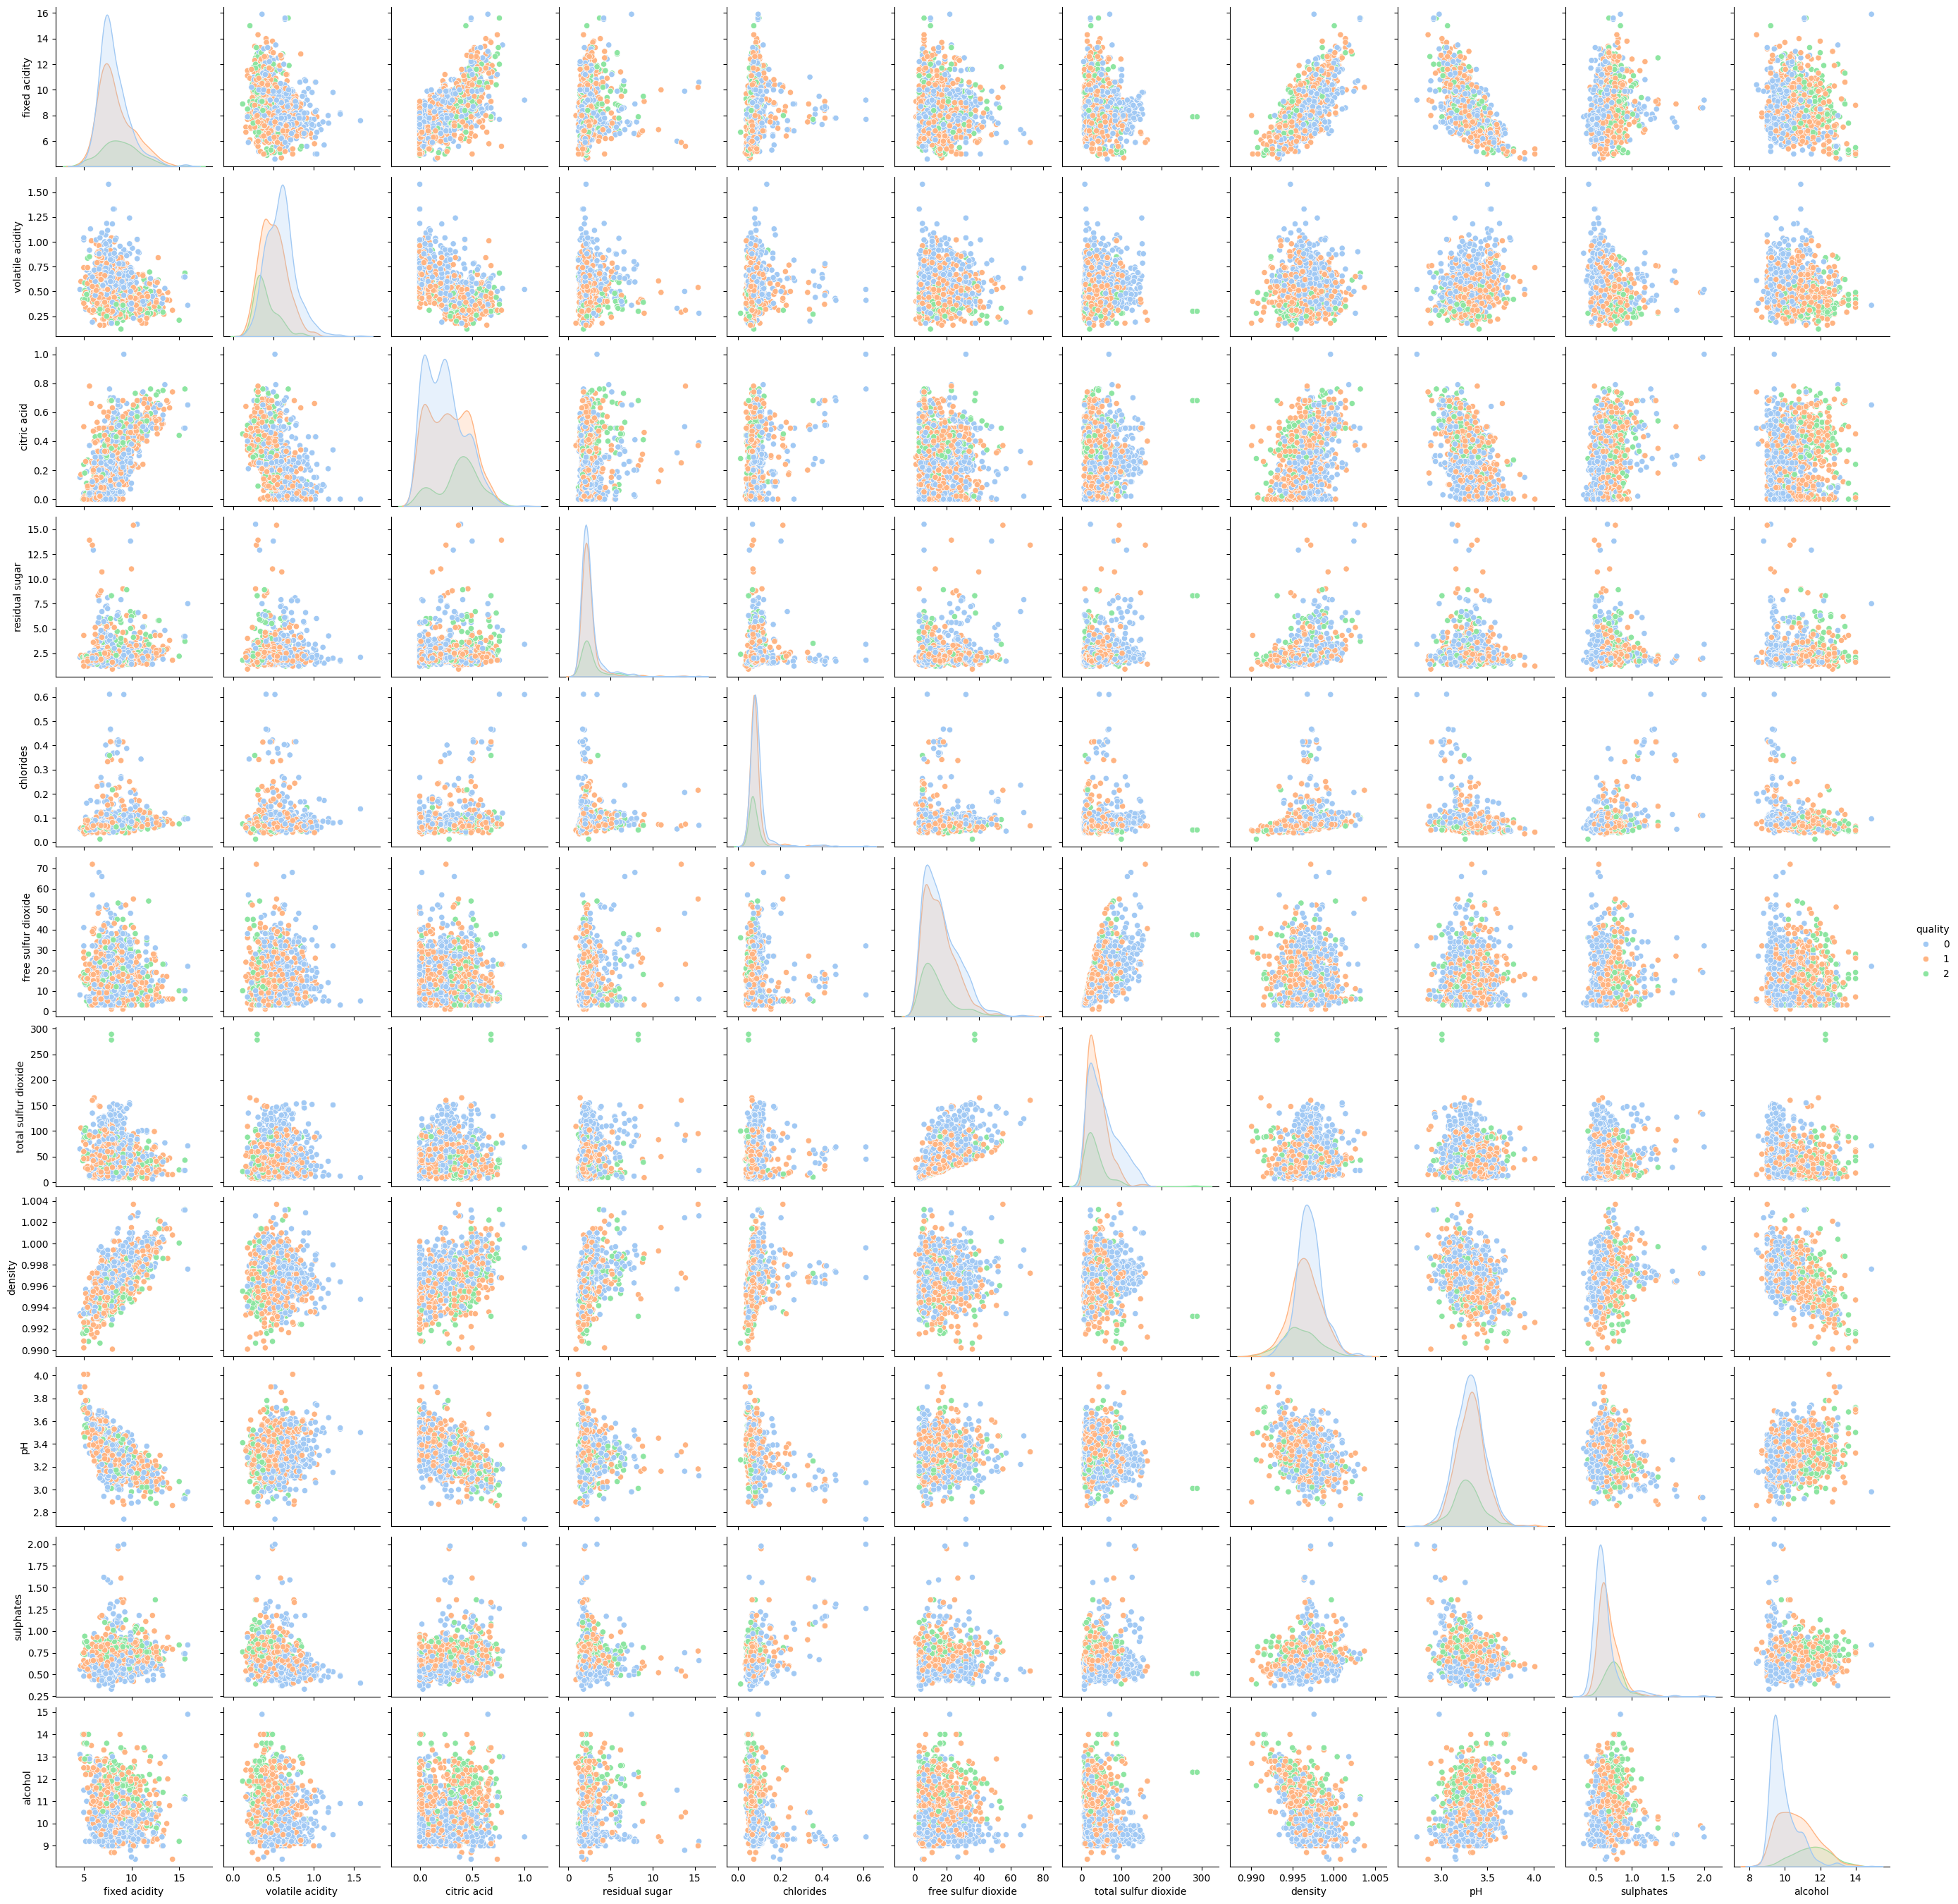

In [16]:
sns.pairplot(df, hue='quality', palette = 'pastel', vars=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'])
plt.show()

### Modelo KNN

In [17]:
#Split de datos
X = df.drop("quality", axis = 1)
y = df["quality"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1016            8.9              0.38         0.40             2.2      0.068   
1519            6.6              0.70         0.08             2.6      0.106   
452             6.8              0.56         0.03             1.7      0.084   
847             7.4              0.68         0.16             1.8      0.078   
58              7.8              0.59         0.18             2.3      0.076   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1016                 12.0                  28.0  0.99486  3.27       0.75   
1519                 14.0                  27.0  0.99665  3.44       0.58   
452                  18.0                  35.0  0.99680  3.44       0.63   
847                  12.0                  39.0  0.99770  3.50       0.70   
58                   17.0                  54.0  0.99750  3.43       0.59   

      alcohol  
1016     12.6  
1519     10.2  
452      10.0  
847       9.9  
58       10.0

In [18]:
num_var = ['fixed acidity', 
           'volatile acidity', 
           'citric acid', 
           'residual sugar', 
           'chlorides', 
           'free sulfur dioxide', 
           'total sulfur dioxide', 
           'density', 
           'pH', 
           'sulphates', 
           'alcohol'
           ]
scaler = StandardScaler()

# Entrenar el escalador con los datos de entrenamiento
scaler.fit(X_train[num_var])

# Aplicar el escalador en ambos
X_train_final = scaler.transform(X_train[num_var])
X_train_final = pd.DataFrame(X_train_final, index = X_train.index, columns = num_var)

X_test_final = scaler.transform(X_test[num_var])
X_test_final = pd.DataFrame(X_test_final, index = X_test.index, columns = num_var)

X_train_final.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1016       0.351623         -0.828323     0.648771       -0.238440  -0.411606   
1519      -0.981548          0.965891    -0.989833        0.054589   0.312800   
452       -0.865620          0.180922    -1.245865       -0.604727  -0.106593   
847       -0.517836          0.853753    -0.580182       -0.531470  -0.220973   
58        -0.285980          0.349130    -0.477769       -0.165183  -0.259100   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
1016            -0.362070             -0.566298 -0.986612 -0.259822   
1519            -0.168479             -0.596342 -0.025508  0.857267   
452              0.218703             -0.355992  0.055032  0.857267   
847             -0.362070             -0.235817  0.538268  1.251534   
58               0.121907              0.214839  0.430882  0.791556   

      sulphates   alcohol  
1016   0.519851  1.984240  
1519  -0.458489 -0.215867  
452   -0.170742 -0.399209  
847    0.232104 -0.490880  
58    -0.400940 -0.399209

In [19]:
# Guardado de los conjuntos de datos
X_train_final.to_csv("../data/processed/X_train.csv", index=False)
X_test_final.to_csv("../data/processed/X_test.csv", index=False)
y_train.to_csv("../data/processed/y_train.csv", index=False)
y_test.to_csv("../data/processed/y_test.csv", index=False)

In [20]:
# Modelo
model = KNeighborsClassifier()

# Entrenamiento
model.fit(X_train_final, y_train)

KNeighborsClassifier()

In [21]:
# Predición
y_pred_test = model.predict(X_test_final)
y_pred_train = model.predict(X_train_final)

y_pred_test

array([0, 1, 2, 0, 1, 2, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 2, 1, 0, 0, 1, 0, 2, 0, 0, 0, 1, 2, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 2, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 2, 1, 2, 1, 2, 0,
       1, 1, 0, 2, 1, 1, 0, 1, 0, 2, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 2, 0,
       2, 1, 0, 2, 0, 2, 0, 1, 0, 1, 0, 1, 2, 1, 1, 0, 0, 0, 2, 1, 0, 2,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 2, 0, 1, 2, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 2, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 2, 1, 0, 1, 0])

In [22]:
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

print("Accuracy Test: ", accuracy_test)
print("Accuracy Train: ", accuracy_train)
print(classification_report(y_test, y_pred_test))

Accuracy Test:  0.5955882352941176
Accuracy Train:  0.7138914443422263
              precision    recall  f1-score   support

           0       0.66      0.71      0.69       135
           1       0.51      0.49      0.50       103
           2       0.55      0.47      0.51        34

    accuracy                           0.60       272
   macro avg       0.57      0.56      0.56       272
weighted avg       0.59      0.60      0.59       272



In [23]:
#Confussion matrix

vinos_cm = confusion_matrix(y_test, y_pred_test)
vinos_cm

array([[96, 37,  2],
       [42, 50, 11],
       [ 7, 11, 16]])

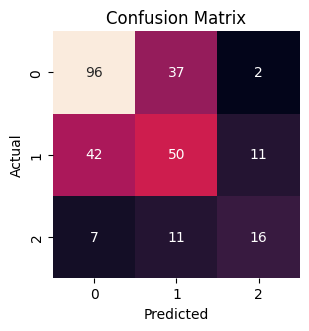

In [24]:
# Dibujaremos esta matriz para hacerla más visual
cm_df = pd.DataFrame(vinos_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Con los parámetros estándar del modelo se obtiene un accuracy del 0.59 en test. Presenta sobreajuste (71% train vs 60% test) y desempeño mediocre en la clasificación ternaria de vinos. La clase de mayor calidad es la peor predecida, con solo 34 muestras en test y un F1-score de 0.51, evidenciando problemas de desbalanceo severo. Se requieren técnicas de balanceo y optimización de hiperparámetros para mejorar la capacidad predictiva, especialmente entre las clases de calidad media y alta que muestran significativa confusión.

=== BÚSQUEDA DEL MEJOR K (GRÁFICO DEL CODO) ===


Mejor K encontrado: 25 con precisión: 0.6765


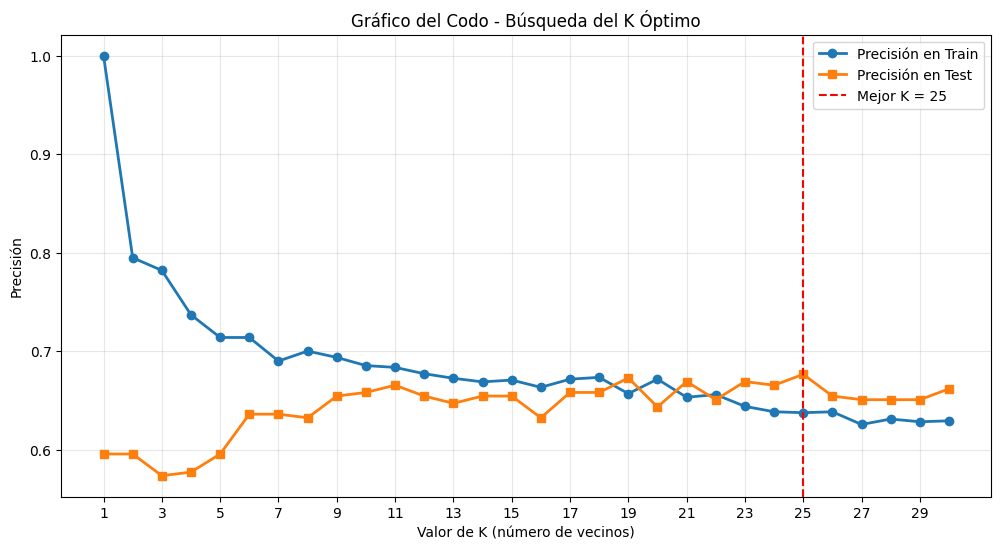


=== ENTRENANDO MODELO FINAL CON K=25 ===


KNeighborsClassifier(n_neighbors=25)

In [25]:
# ========== GRÁFICO DEL CODO ==========
print("=== BÚSQUEDA DEL MEJOR K (GRÁFICO DEL CODO) ===")

k_range = range(1, 31)  # Probamos K de 1 a 30
train_scores = []
test_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_final, y_train)
    
    # Precisión en train y test
    train_score = knn.score(X_train_final, y_train)
    test_score = knn.score(X_test_final, y_test)
    
    train_scores.append(train_score)
    test_scores.append(test_score)

# Encontrar el mejor K
best_k_index = test_scores.index(max(test_scores))
best_k = k_range[best_k_index]
best_score = max(test_scores)

print(f"Mejor K encontrado: {best_k} con precisión: {best_score:.4f}")

# Visualizar el gráfico del codo
plt.figure(figsize=(12, 6))
plt.plot(k_range, train_scores, label='Precisión en Train', marker='o', linewidth=2)
plt.plot(k_range, test_scores, label='Precisión en Test', marker='s', linewidth=2)
plt.axvline(x=best_k, color='red', linestyle='--', label=f'Mejor K = {best_k}')
plt.xlabel('Valor de K (número de vecinos)')
plt.ylabel('Precisión')
plt.title('Gráfico del Codo - Búsqueda del K Óptimo')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 31, 2))
plt.show()

# ========== ENTRENAR MODELO FINAL ==========
print(f"\n=== ENTRENANDO MODELO FINAL CON K={best_k} ===")
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train_final, y_train)

Se prueba a cambiar los otros parámetros en un rango de k situado cerca de 25

In [26]:
from sklearn.model_selection import GridSearchCV

# Búsqueda de mejores hiperparámetros
param_grid = {
    'n_neighbors': range(15, 35),  # Ampliar rango alrededor de 25
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]  # Para minkowski: 1=manhattan, 2=euclidean
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_final, y_train)

print("Mejores parámetros:", grid_search.best_params_)
print("Mejor score (CV):", grid_search.best_score_)

Mejores parámetros: {'metric': 'manhattan', 'n_neighbors': 32, 'p': 1, 'weights': 'distance'}
Mejor score (CV): 0.6144717372003551


Accuracy Train con mejores parámetros: 1.0000
Accuracy Test con mejores parámetros: 0.7132
Diferencia Train-Test: 0.2868

=== REPORTE DE CLASIFICACIÓN (TEST) ===
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       135
           1       0.62      0.63      0.63       103
           2       0.68      0.56      0.61        34

    accuracy                           0.71       272
   macro avg       0.70      0.67      0.68       272
weighted avg       0.71      0.71      0.71       272



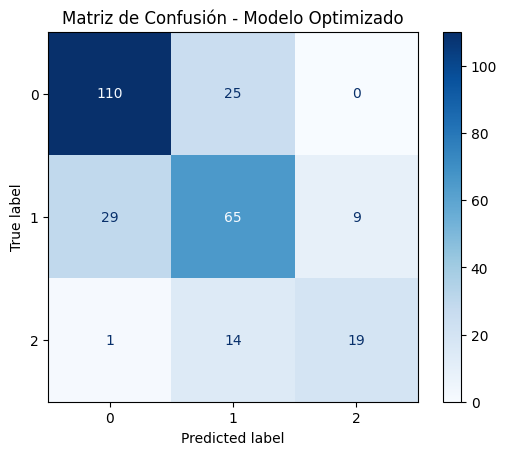

In [27]:
# Entrenar modelo final con mejores parámetros
best_knn = KNeighborsClassifier(
    n_neighbors=32,
    weights='distance', 
    metric='manhattan',
    p=1
)
best_knn.fit(X_train_final, y_train)

# Evaluar en train y test
y_pred_train = best_knn.predict(X_train_final)
y_pred_test = best_knn.predict(X_test_final)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Accuracy Train con mejores parámetros: {train_accuracy:.4f}")
print(f"Accuracy Test con mejores parámetros: {test_accuracy:.4f}")
print(f"Diferencia Train-Test: {train_accuracy - test_accuracy:.4f}")

print("\n=== REPORTE DE CLASIFICACIÓN (TEST) ===")
print(classification_report(y_test, y_pred_test))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Matriz de Confusión - Modelo Optimizado')
plt.show()

### Conclusión
El modelo optimizado es significativamente superior al original. Se ha pasado de un modelo mediocre (59.6%) a uno competitivo (71.3%) manteniendo la capacidad predictiva en todas las categorías de calidad. El ajuste de hiperparámetros ha valido la pena, y aunque el test demuestre memorización por el 1, el resultado del test denota una buena generalización.

Aún así,  el modelo sobrestima la calidad (tendencia a predecir clases más altas), especialmente confundiendo vinos "buenos" con "muy buenos". Esto es común en catas de vino donde los límites entre categorías son subjetivos.

Por lo tanto, como conclusión se denota un buen desempeño general, pero necesita refinar la distinción entre calidades media-alta, posiblemente con más características sensibles a estos matices.

In [28]:
# Guardar el modelo
with open("../models/knn_classifier_k10_manhattan_distance.sav", "wb") as f:
    pickle.dump(best_knn, f)

### Introducción de nuevos datos
Se crea una función que reciba nuevos valores numéricos de las características de un nuevo vino y prediga la calidad del mismo.

In [29]:
def predict_wine_quality(fixed_acidity, volatile_acidity, citric_acid, residual_sugar, 
                         chlorides, free_sulfur_dioxide, total_sulfur_dioxide, density,
                         pH, sulphates, alcohol):

    # Crear array con las características en el orden correcto
    nuevas_caracteristicas = [[
        fixed_acidity, volatile_acidity, citric_acid, residual_sugar,
        chlorides, free_sulfur_dioxide, total_sulfur_dioxide, density,
        pH, sulphates, alcohol
    ]]
    
    # Escalar las características
    caracteristicas_escaladas = scaler.transform(nuevas_caracteristicas)
    
    # Hacer predicción
    prediccion = best_knn.predict(caracteristicas_escaladas)[0]
    probabilidades = best_knn.predict_proba(caracteristicas_escaladas)[0]
    
    # Mapear números a etiquetas comprensibles
    calidad_dict = {
        0: "Baja Calidad",
        1: "Media Calidad", 
        2: "Alta Calidad"
    }
    
    # Crear resultado
    resultado = {
        'calidad_predicha': calidad_dict[prediccion],
        'clase_numerica': prediccion,
        'probabilidades': {
            'baja_calidad': round(probabilidades[0], 3),
            'media_calidad': round(probabilidades[1], 3),
            'alta_calidad': round(probabilidades[2], 3)
        },
        'confianza': round(max(probabilidades), 3)
    }
    
    # Mostrar resultados de forma legible
    print("=" * 50)
    print("PREDICCIÓN DE CALIDAD DE VINO")
    print("=" * 50)
    print(f"Calidad Predicha: {resultado['calidad_predicha']}")
    print(f"Confianza: {resultado['confianza'] * 100}%")
    print("\nProbabilidades por categoría:")
    print(f"  - Baja Calidad: {resultado['probabilidades']['baja_calidad'] * 100}%")
    print(f"  - Media Calidad: {resultado['probabilidades']['media_calidad'] * 100}%") 
    print(f"  - Alta Calidad: {resultado['probabilidades']['alta_calidad'] * 100}%")
    print("=" * 50)
    
    return resultado

# Ejemplo de uso
if __name__ == "__main__":
    # Ejemplo con valores típicos (puedes modificarlos)
    ejemplo = predict_wine_quality(
        fixed_acidity=7.4,
        volatile_acidity=0.7,
        citric_acid=0.0,
        residual_sugar=1.9,
        chlorides=0.076,
        free_sulfur_dioxide=11.0,
        total_sulfur_dioxide=34.0,
        density=0.9978,
        pH=3.51,
        sulphates=0.56,
        alcohol=9.4
    )

PREDICCIÓN DE CALIDAD DE VINO
Calidad Predicha: Baja Calidad
Confianza: 100.0%

Probabilidades por categoría:
  - Baja Calidad: 100.0%
  - Media Calidad: 0.0%
  - Alta Calidad: 0.0%
